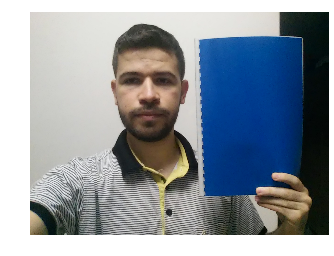

True

In [550]:
#import necessary libraries: OpenCv, Numpy, Matplotlib
import cv2
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import os

img_save_path = 'calisma_2_3/'

#create folder ofnot existing
try:
    os.stat(img_save_path)
except:
    os.mkdir(img_save_path) 

# read image file
img_path = 'IMG_20180409_200058.jpg'
img = cv2.imread(img_path)
img_shape = img.shape

#convert color from BGR to RGB
image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#display image
plt.axis("off")
#plt.figure(figsize=(20,44))
plt.imshow(image)
plt.show()

cv2.imwrite(img_save_path+"RGB_"+img_path,cv2.cvtColor(image,cv2.COLOR_RGB2BGR))

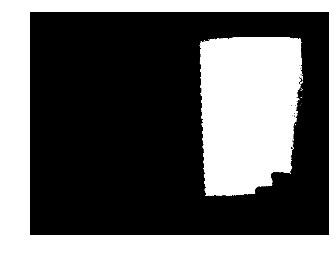

True

In [551]:
# choose filter parameters
rgb_lower_filter = (0,0,100)
rgb_upper_filter = (50,150,255)

#create mask using filter
mask = cv2.inRange(image, rgb_lower_filter, rgb_upper_filter)

#display mask
plt.axis("off")
plt.imshow(mask,cmap='gray')
plt.show()

#save it
cv2.imwrite(img_save_path+"RGB_mask_"+img_path,mask)

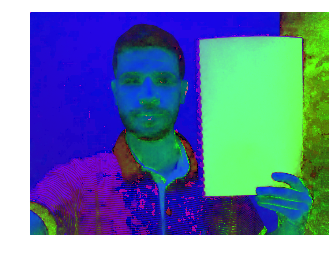

True

In [552]:
#convert from RGB to HSV
hsv = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
plt.axis("off")
plt.imshow(hsv)
plt.show()

# TODO: fix colours ofsavedimage
cv2.imwrite(img_save_path+"HSV_"+img_path,hsv)

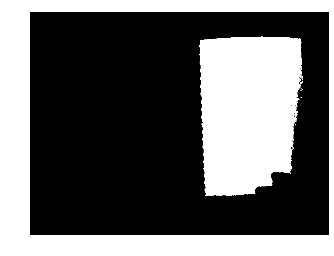

True

In [553]:
#new filter parameters
hsv_lower_filter = (100, 150, 100)
hsv_upper_filter = (115, 255, 255)

#new mask
mask = cv2.inRange(hsv, hsv_lower_filter, hsv_upper_filter)

#display new mask
plt.axis("off")
plt.imshow(mask,cmap='gray')
plt.show()
cv2.imwrite(img_save_path+"HSV_mask_"+img_path,mask)

In [554]:
# find contours
contours,_= cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
len(contours)

66

In [555]:
#get center andradius of enclosing circle
center_list = []
radius_list = []
for cnt in contours:
    (x,y),radius = cv2.minEnclosingCircle(cnt)
    center_list.append((int(x),int(y)))
    radius_list.append(int(radius))
    
#get index of circle with largest radius
ix = np.argmax(radius_list)

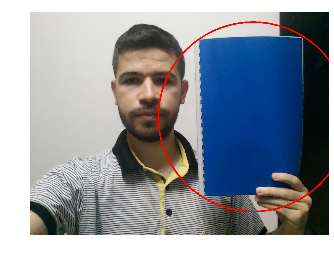

True

In [556]:
#create copy of image
out_image = image.copy()

#draw circle on it
cv2.circle(out_image,center_list[ix],radius_list[ix],(255,0,0),5)

#display it
plt.axis("off")
plt.imshow(out_image)
plt.show()
cv2.imwrite(img_save_path+"Cir_"+img_path,cv2.cvtColor(out_image,cv2.COLOR_RGB2BGR))

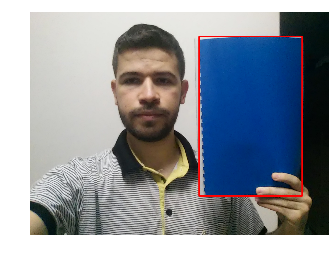

True

In [557]:
#get location and dimensions of bounding rectangle
x,y,w,h = cv2.boundingRect(contours[ix])

#create copy of image
out_image = image.copy()

#draw rectangle on it
cv2.rectangle(out_image,(x,y),(x+w,y+h),(255,0,0),5)

#display it
plt.axis("off")
plt.imshow(out_image)
plt.show()
cv2.imwrite(img_save_path+"Rect_"+img_path,cv2.cvtColor(out_image,cv2.COLOR_RGB2BGR))